In [0]:
#importing relevant libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


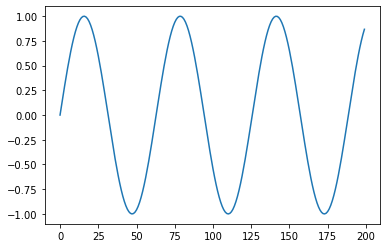

In [3]:
#Synthesizing artifical data
series=np.sin(0.1*np.arange(200))
plt.plot(series)
plt.show()

In [9]:
#building the dataset
#Lets see if we can use T past values to predict the next value
T=10
X=[]
Y=[]

for t in range(len(series) -T):
  x=series[t:t+T]     #taking from t upto (t+T -1)  values as past values
  X.append(x)
  y=series[t+T]       #taking (t+T)th Value as future value
  Y.append(y)
#print(X)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(str(X.shape)+', ' +str(Y.shape))

(190, 10), (190,)


In [19]:
#Creating Auto- Regression Model
i =Input(shape=(T,))
x=Dense(1)(i)   #not classifying so no activation required and only one Hidden layer for now

#model part
model=Model(i,x)

#specifying optimizer and loss for model
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

nby2val=int(-N/2)
x_train=X[:nby2val]
y_train=Y[:nby2val]
x_test=X[nby2val:]
y_test=Y[nby2val:]
#Training the model
r=model.fit(x_train,y_train , epochs=80, validation_data=(x_test,y_test))

Epoch 1/80
3/3 [==============================] - 0s 26ms/step - loss: 0.3442 - val_loss: 0.2939
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.2345 - val_loss: 0.0561
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0811 - val_loss: 0.1035
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1050 - val_loss: 6.8128e-04
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0224 - val_loss: 0.0559
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0647 - val_loss: 0.0111
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0148 - val_loss: 0.0558
Epoch 8/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0408 - val_loss: 0.0091
Epoch 9/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0061 - val_loss: 0.0258
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0257 - val_loss: 0.0105
Epoch 11/80
3/3 [========

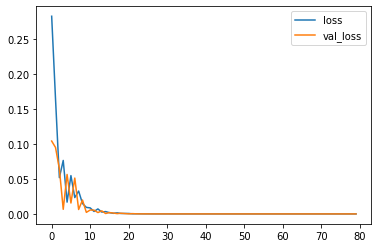

In [18]:
#Plotting loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
#Plotting accuracy per iteration
predicted_y=[]
#print(Y.shape)
for  n in x_test:
  #print((n.reshape(1,-1)).shape)
  if len(predicted_y)<len(y_test):
    predicted_y.append(model.predict(n.reshape(1,-1))[0,0])



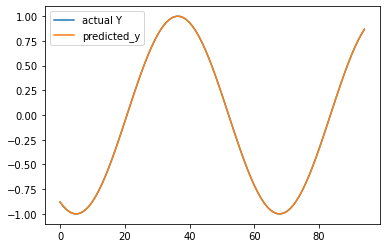

In [47]:
#Plotting y_test, predicted_y
plt.plot(y_test,label='actual Y')
plt.plot(predicted_y,label='predicted_y')
plt.legend()

In [0]:
#Plotting correct method
predicted_y=[]
last_x=X[int(-N/2)]
while len(predicted_y)<len(y_test):
  p=model.predict(last_x.reshape(1,-1))[0,0]
  predicted_y.append(p)
  last_x=np.roll(last_x,-1)
  last_x[-1]=p



In [63]:
#Sample prediction
# samplet data-0.27176063, -0.36647913, -0.45753589, -0.54402111,-0.62507065,-0.69987469,-0.76768581,-0.82782647,-0.17432678,-0.27176063,-0.36647913,
x2=[[-0.27176063, -0.36647913, -0.45753589, -0.54402111,-0.62507065,-0.69987469,-0.76768581,-0.82782647,-0.17432678,-0.27176063]]
x2=np.array(x2)
y2=model.predict(x2)
y2

array([[-0.37970278]], dtype=float32)